<a href="https://colab.research.google.com/github/BorceKhen/CSST-102---Basic-Machine-Learning/blob/main/Borce_RonKen_EndtoEndML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Implementation of the Following Steps"

Shape: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154    

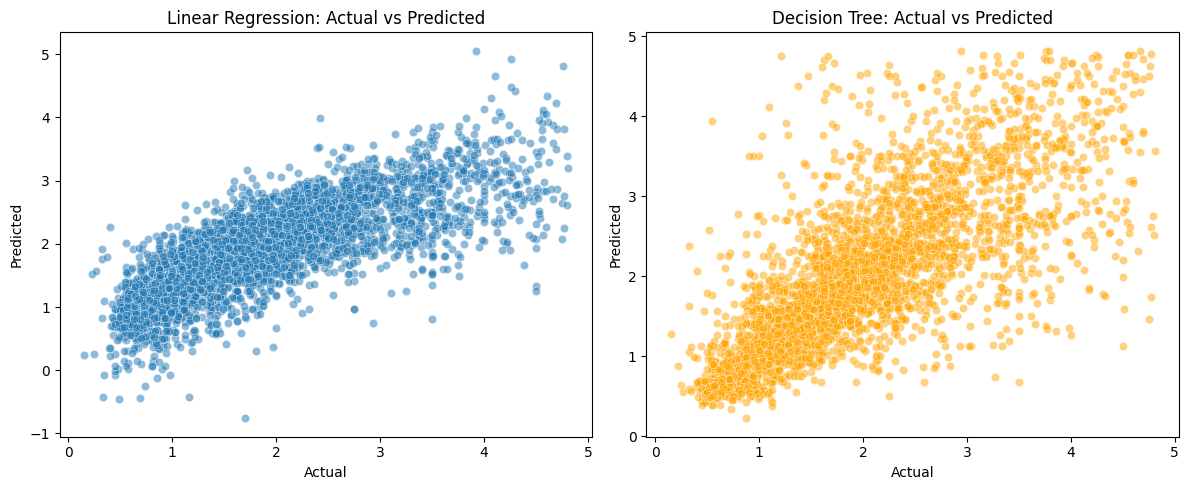

In [2]:
#BSCS3B_Borce
#CSST102

# Step 1: Load and Explore the Dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing = fetch_california_housing(as_frame=True)
df = housing.frame
print("Shape:", df.shape)
print(df.info())
print(df.describe())
df.head()

# Step 2: Handle Missing Values and Outliers
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# This is Optional: Remove outliers using IQR method for MedHouseVal
Q1 = df['MedHouseVal'].quantile(0.25)
Q3 = df['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['MedHouseVal'] >= Q1 - 1.5 * IQR) & (df['MedHouseVal'] <= Q3 + 1.5 * IQR)]

# Step 3: Splitting the Data
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Two Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Step 5: Evaluate Models
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

# Decision Tree
dt_preds = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")
print(f"Decision Tree - MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}")

# Step 6: Visualizing the Results
plt.figure(figsize=(12, 5))

# Linear Regression Scatter
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.5)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Decision Tree Scatter
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=dt_preds, alpha=0.5, color='orange')
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

# Write a short summary cell explaining:
Which model performed better?

What were the challenges you encountered?

Between the two models tested—Linear Regression and Decision Tree—the Linear Regression model performed better, showing a lower Mean Squared Error and higher R² score. It captured the linear relationships in the housing data more effectively, while the Decision Tree tended to overfit.

Challenges included handling outliers in , which skewed predictions early on. Although there were no missing values, preprocessing was still key to improving model performance. Both models struggled with extreme values, suggesting that future improvements could involve ensemble methods or transforming the target variable.